<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/Classification_(KNN_Evaluation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K- Nearest Neighbor 

เป็นอัลกอลิทึ่มที่ใช้ในการจัดกลุ่มข้อมูล (Classification) ซึ่งเป็นอัลกอลิทึ่มที่อยู่ในกลุ่มของ Supervised learning

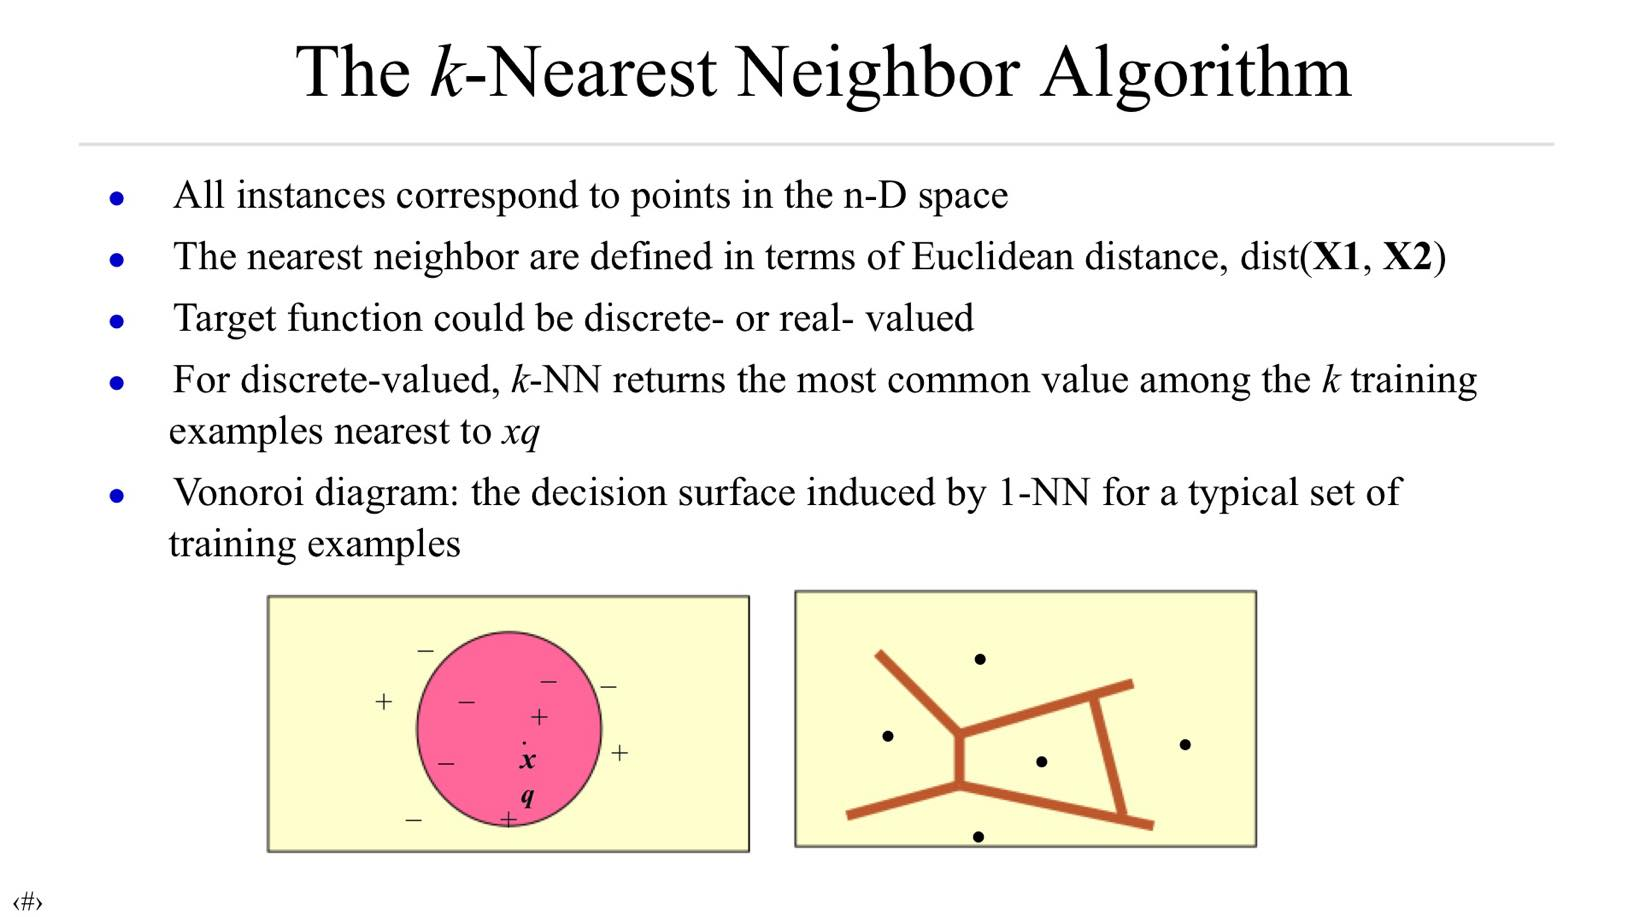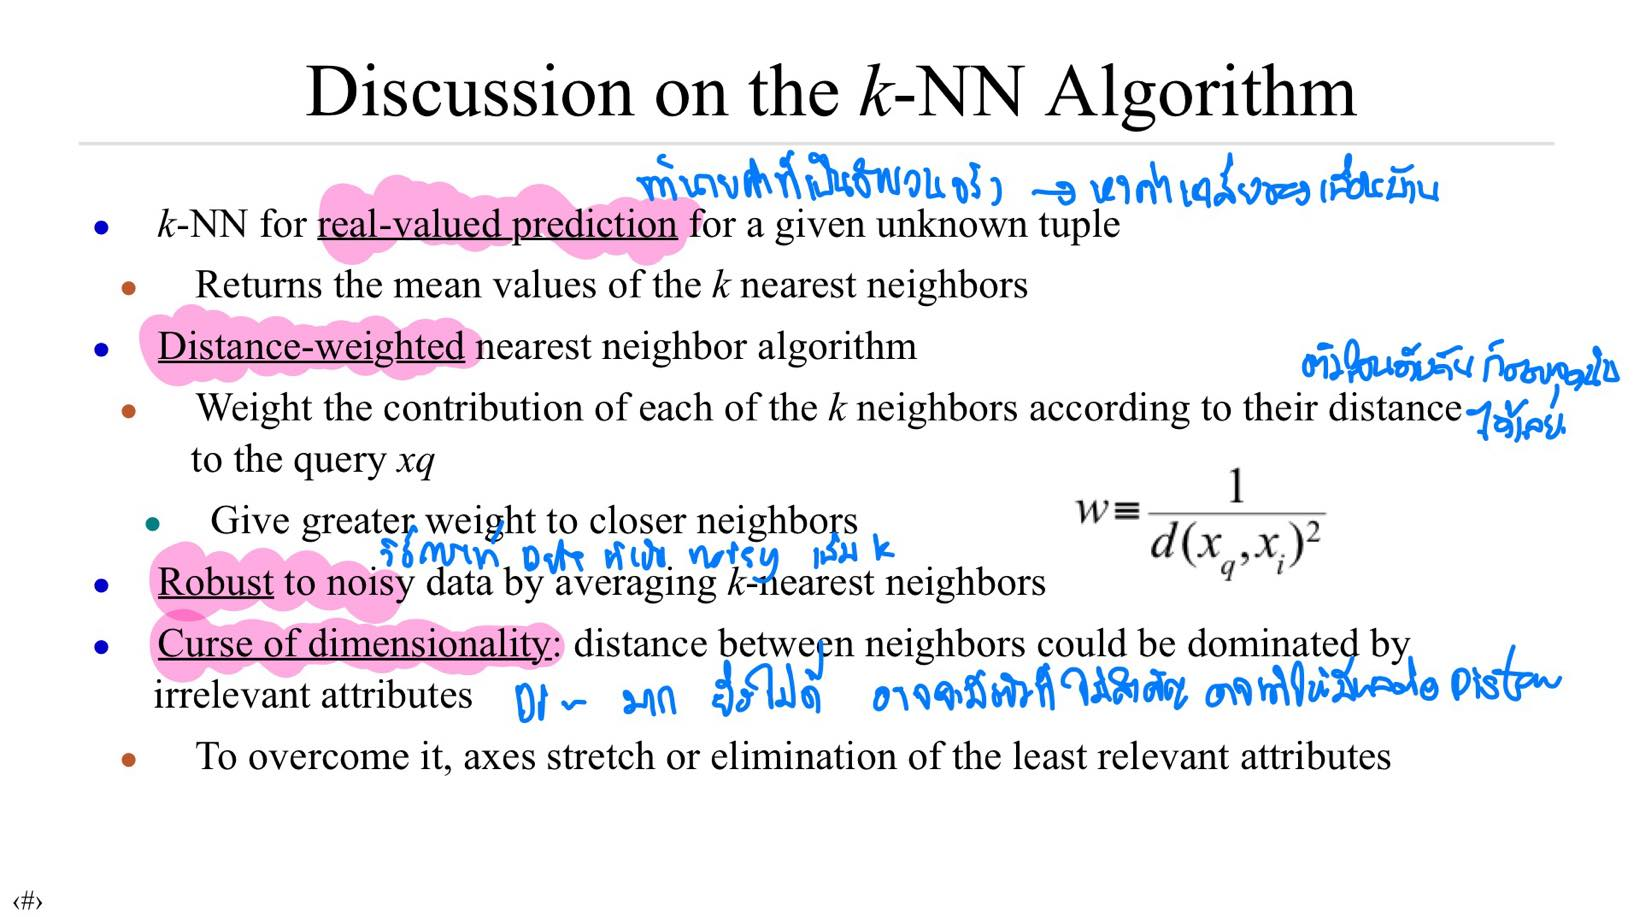

## ขั้นตอนดังนี้

### Load data

In [ ]:
from sklearn import datasets
mnist_data = datasets.load_digits()

X = mnist_data['data']
Y = mnist_data['target']

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6)

### KNN

### import

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Define-Train Model1

In [ ]:
neigh1 = KNeighborsClassifier(n_neighbors=1) #เชื่อใกล้สุดแค่คนเดียว
neigh1.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Define-Train Model2

In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=5,weights='distance') #เชื่อคนใกล้มากว่าคนไกล
neigh2.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

### Define-Train Model3

In [ ]:
neigh3 = KNeighborsClassifier(n_neighbors=9,weights='distance') #เชื่อทุกคนเท่ากัน
neigh3.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

### Validate model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn1_result = neigh1.predict(X_val)
accuracy_score(y_val,knn1_result)

0.9777777777777777

In [ ]:
knn2_result = neigh2.predict(X_val)
accuracy_score(y_val,knn2_result)

0.9777777777777777

In [ ]:
knn3_result = neigh3.predict(X_val)
accuracy_score(y_val,knn3_result)

0.9703703703703703

### Evaluation

### retrain model with full training data

In [ ]:
neigh1full = KNeighborsClassifier(n_neighbors=1) #เชื่อใกล้สุดแค่คนเดียว
neigh1full.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
neigh2full = KNeighborsClassifier(n_neighbors=5,weights='distance') #เชื่อคนใกล้มากว่าคนไกล
neigh2full.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

### Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm1 = confusion_matrix(y_test,neigh1full.predict(X_test))
cm1

array([[99,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 92,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0, 98,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 77,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 95,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 91,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 84,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 94,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 80,  1],
       [ 0,  0,  0,  2,  0,  3,  0,  0,  0, 73]])

In [ ]:
cm2 = confusion_matrix(y_test,neigh2full.predict(X_test))
cm2

array([[99,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 93,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 97,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 78,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 95,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 92,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 84,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 94,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  1,  0, 77,  1],
       [ 0,  0,  0,  2,  0,  2,  0,  0,  0, 74]])

In [ ]:
cr1 = classification_report(y_test,neigh1full.predict(X_test))
print(cr1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.98      0.99      0.98        93
           2       0.99      0.98      0.98       100
           3       0.96      0.97      0.97        79
           4       1.00      0.99      0.99        96
           5       0.97      0.99      0.98        92
           6       0.99      0.99      0.99        85
           7       1.00      1.00      1.00        94
           8       0.98      0.96      0.97        83
           9       0.96      0.94      0.95        78

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [ ]:
cr2 = classification_report(y_test,neigh2full.predict(X_test))
print(cr2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.97      1.00      0.98        93
           2       0.99      0.97      0.98       100
           3       0.94      0.99      0.96        79
           4       1.00      0.99      0.99        96
           5       0.98      1.00      0.99        92
           6       0.99      0.99      0.99        85
           7       0.99      1.00      0.99        94
           8       1.00      0.93      0.96        83
           9       0.97      0.95      0.96        78

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

